# pre-edge解析

In [1]:
# データを総合して解析を行う
import os
import scipy.optimize
import pandas as pd
import numpy as np
import glob #フォルダ内の特定の拡張子のファイルを一括で読み込む
%matplotlib inline
import matplotlib.pyplot as plt
os.chdir("C:\\Users\\cocoa\\Documents\\実験\\BL-12C\\220702-BL12C-Fe")
print(os.getcwd())

C:\Users\cocoa\Documents\実験\BL-12C\220702-BL12C-Fe


In [2]:
"""フォルダ内のXANファイルをすべて読み込む"""
spectrum=[[],[],[]]
n,m = 1, 1

for filename in glob.glob("*.xan*"):
    p = pd.read_csv(filename)
    
    for i in range(len(p)):
        if p["[XAN_DATA]"][i]=="[BG_BEGIN]":
            n = i
        elif p["[XAN_DATA]"][i]=="[BG_END]":
            m = i
        else: continue
    
    data = pd.read_csv(filename,encoding="SHIFT_JIS",sep=('\t'),usecols=[1,2,3,4],names=[1,2,3,4],
                       skiprows=n+3)[1:m-n]
    spectrum[0].append(data[1])
    spectrum[1].append(data[2])
    spectrum[2].append(filename)


In [3]:
print("sample list")
for i in range(len(spectrum[2])):
    print(str(i)+"  "+spectrum[2][i])

sample list
0  ammonium_oxalate_Fe_dat.xan
1  biotite_dat.xan
2  Fe3O4_dat.xan
3  FeC2O4_2H2O_dat.xan
4  ferrihydrite_dat.xan
5  ferritin_dat.xan
6  ferritin_EX_dat (1).xan
7  ferritin_EX_dat.xan
8  FeS_dat.xan
9  goethite_dat.xan
10  hematite_dat.xan
11  MKR_02_liver_0_s_intp.xan
12  MKR_02_liver_2_0_s_intp_averaged.xan
13  MKR_02_liver_sdd.xan
14  MKR_02_ovary.xan
15  MKR_02_Red_muscle-3.xan
16  MKR_02_Red_muscle_0_s.xan
17  MKR_02_red_muscle_sdd.xan
18  MKR_02_White_muscle_3.xan
19  MKR_02_white_muscle_step.xan
20  MKR_04_liver-1_0_s_intp.xan
21  MKR_04_liver-2_gain10_0_s_intp.xan
22  MKR_04_liver_sdd.xan
23  MKR_04_ovary.xan
24  MKR_04_Red_muscle-1_0_s_intp.xan
25  MKR_04_Red_muscle-1_0_s_intp_averaged.xan
26  MKR_04_Red_Muscle.xan
27  MKR_04_red_muscle_sdd.xan
28  MKR_04_White_muscle.xan
29  MKR_06_blood_sdd.xan
30  MKR_06_heart.xan
31  MKR_06_liver_sdd.xan
32  MKR_06_Red_muscle_0_s_intp.xan
33  MKR_06_Red_muscle_averaged.xan
34  MKR_06_red_muscle_sdd.xan
35  MKR_06_Red_muscle_ste

In [4]:
data_num = 31
%matplotlib qt
print("拡大範囲を選択")
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.set_xlim(7090, 7200)
ax.grid()
ax.tick_params(left=False)
data_range = []

def onclick(event):
    if event.xdata == None or event.ydata == None:
        return
    else:
        print( 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %(
            event.button, event.x, event.y, event.xdata, event.ydata))
        data_range.append(event.xdata)
    

fig.canvas.mpl_connect('button_press_event', onclick)

energy = [float(i) for i in spectrum[0][data_num]]
line = spectrum[1][data_num] 
ax.scatter(energy,line,linewidth = 3,label=spectrum[2][data_num])
plt.title(spectrum[2][data_num])


拡大範囲を選択


Text(0.5, 1.0, 'MKR_06_liver_sdd.xan')

button=1, x=170, y=93, xdata=7105.770609, ydata=0.003015
button=1, x=210, y=104, xdata=7113.655914, ydata=0.039642


In [5]:
select_0 = np.ones(len(spectrum[0][data_num]))* data_range[0]
select_1 = np.ones(len(spectrum[0][data_num]))* data_range[1]

x = [float(s) for s in spectrum[0][data_num]]
'''list: spectrumの中の文字列がすべて数値floatではなく文字列strになっているため、上記のようにして数値に変換する'''
select_x_0 = abs(x-select_0)
select_x_0=select_x_0.tolist()# ndarrayをリストに変換
select_x_00=select_x_0.index(min(select_x_0))# 選択した点に一番近い要素のインデックス

select_x_1 = abs(x-select_1)
select_x_1=select_x_1.tolist()# ndarrayをリストに変換
select_x_11 = select_x_1.index(min(select_x_1))# 選択した点に一番近い要素のインデックス
print(spectrum[0][data_num][select_x_00], spectrum[0][data_num][select_x_11])
print(select_x_00, select_x_11)

7105.49794327 7113.25548551
94 125


In [6]:
select_range = [spectrum[0][data_num][select_x_00:select_x_11], spectrum[1][data_num][select_x_00:select_x_11]]
%matplotlib qt
print("切り取り範囲を選択")
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_xlabel("energy [eV]",fontsize=16)
ax.set_ylabel(" ")
ax.grid()
ax.tick_params(left=False)
data_range = []

fig.canvas.mpl_connect('button_press_event', onclick)

energy = [float(s) for s in select_range[0]] #これもそのままだとstrオブジェクトだったのでfloatに変換した
line = [float(s) for s in select_range[1]] 
ax.scatter(energy,line,linewidth = 3,label=spectrum[2][data_num])
plt.title(spectrum[2][data_num])

切り取り範囲を選択


Text(0.5, 1.0, 'MKR_06_liver_sdd.xan')

button=1, x=181, y=116, xdata=7106.725333, ydata=0.006890
button=1, x=534, y=336, xdata=7111.944885, ydata=0.043950


In [7]:
select_0 = np.ones(len(select_range[0]))* data_range[0]
select_1 = np.ones(len(select_range[1]))* data_range[1]

x = [float(s) for s in select_range[0]]
'''list: spectrumの中の文字列がすべて数値floatではなく文字列strになっているため、上記のようにして数値に変換する'''
select_x_0 = abs(x-select_0)
select_x_0=select_x_0.tolist()# ndarrayをリストに変換
select_x_00=select_x_0.index(min(select_x_0))# 選択した点に一番近い要素のインデックス

select_x_1 = abs(x-select_1)
select_x_1=select_x_1.tolist()# ndarrayをリストに変換
select_x_11 = select_x_1.index(min(select_x_1))# 選択した点に一番近い要素のインデックス
print(spectrum[0][data_num][select_x_00], spectrum[0][data_num][select_x_11])

7076.17089127 7086.71314734


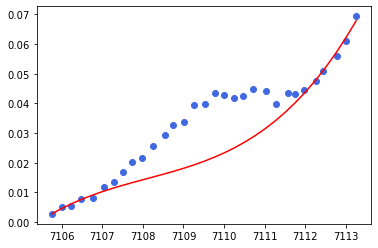

In [8]:
'平滑化スプラインの実施'
length = len(select_range[0])
background = [pd.concat([select_range[0][0:select_x_00],select_range[0][select_x_11:length]]),
              pd.concat([select_range[1][0:select_x_00],select_range[1][select_x_11:length]])]
              #pre-edgeを除いた部分

from scipy import signal, interpolate

x = [float(s) for s in background[0]]
y = [float(s) for s in background[1]]

reg = interpolate.UnivariateSpline(x,y)
xs = np.linspace(x[0], x[len(x)-1], len(select_range[0]))

regy = reg(xs)
%matplotlib inline
plt.plot(xs,regy, color="red")
plt.scatter(energy, line, color="royalblue")

In [9]:
'raw data - 回帰値'
regy_val = [float(s) for s in regy]
raw_data = [float(s) for s in select_range[1]]
subtract = raw_data - regy
energy = [float(s) for s in select_range[0]]

'Gaussian Fitting'
from scipy.optimize import curve_fit

def Gaussian_fit (x, Slope, FWHM, centroid):
    Gauss = []
    for i in range(len(x)):
        Gauss.append(Slope/FWHM/((np.pi/2)**(0.5))*np.exp(-2*((x[i]/1000-7.105)*1000-centroid)**2/(FWHM**2)))   
    return Gauss

popt, pcov = curve_fit(Gaussian_fit, xdata = energy, ydata = subtract, p0=[0.001, 2 ,5])# popt: 最適化されたパラメータ, pcov : poptの推定共分散

Slope, FWHM, centroid
[0.05967913 2.30807659 4.64946265]


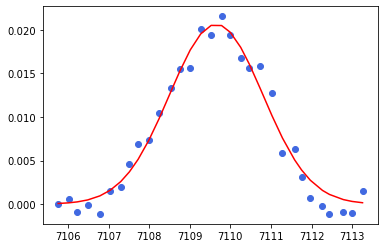

In [10]:
fit = Gaussian_fit(energy,*popt)
plt.plot(energy,fit, color="red")
plt.scatter(energy, subtract, color ="royalblue")
print("Slope, FWHM, centroid")
print(popt)